![Iris Flower](https://www.willemsefrance.fr/cdn/shop/articles/banniere_Maximisez_la_floraison_de_vos_iris_avec_nos_conseils_d_entretien_pratiques4_YZ.jpg?v=1705552183)

# Introduction

Welcome to the **[Iris Classifier]** documentation! This project focuses on utilizing machine learning techniques to classify the types of Iris flowers based on their features. By leveraging a Decision Tree classifier, this application demonstrates the power of data analysis and predictive modeling in understanding the characteristics of different Iris species.


## Objectives

The main objectives of this project are:
- To analyze the Iris dataset and extract relevant features.
- To implement a Decision Tree model for classification.
- To evaluate the model's performance and make predictions based on user input.

In this documentation, you will find:
- A description of the dataset and its features.
- An explanation of the methodology used in the project.
- Code snippets demonstrating the implementation of the Decision Tree classifier.
- Instructions for running the project and making predictions.

Whether you're a data science enthusiast, a machine learning practitioner, or just curious about classification algorithms, this project aims to provide valuable insights and practical examples. Let's dive in!

## Step 1: Import Necessary Libraries

We begin by importing the required libraries for data manipulation, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Step 2: Load the Dataset

Next, we load the Iris dataset into a DataFrame using `pandas`.

In [2]:
data = pd.read_csv("iris_data.csv")

data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Step 3: Explore the Data

We perform initial exploratory data analysis to understand the shape and structure of the dataset.

In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Step 4: Identify Unique Species

We identify the unique species present in the dataset.

In [6]:
unique_species = data['Species'].unique()

unique_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Step 5: Map Species to Numeric Values

To facilitate classification, we map the species names to numerical values.

In [7]:
species_mapping = {
    'Iris-setosa': 1,
    'Iris-versicolor': 2,
    'Iris-virginica': 3
}

data['species_mapped'] = data['Species'].map(species_mapping)

# Print the DataFrame with the new mapped column
print(data[['Species', 'species_mapped']])

            Species  species_mapped
0       Iris-setosa               1
1       Iris-setosa               1
2       Iris-setosa               1
3       Iris-setosa               1
4       Iris-setosa               1
..              ...             ...
145  Iris-virginica               3
146  Iris-virginica               3
147  Iris-virginica               3
148  Iris-virginica               3
149  Iris-virginica               3

[150 rows x 2 columns]


## Step 6: Drop Unnecessary Columns

We remove the original species names and any other unnecessary columns from the dataset.

In [8]:
data.drop(columns=['Id', 'Species'], inplace=True)

In [9]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_mapped
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


## Step 7: Visualize the Species Distribution (Bar Plot)

We visualize the distribution of the mapped species using a bar plot.

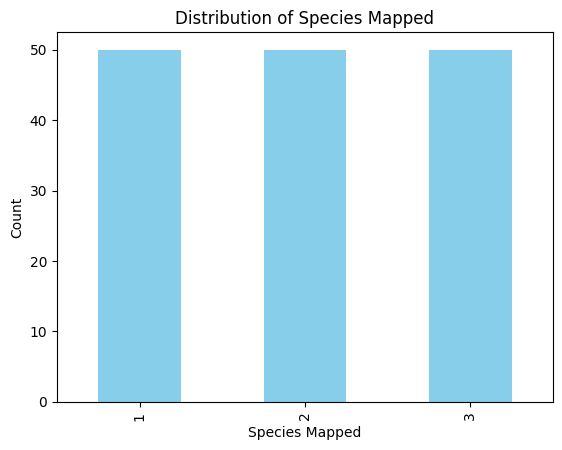

In [10]:
# Plot the 'species_mapped' column using a bar plot
data['species_mapped'].value_counts().plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Distribution of Species Mapped')
plt.xlabel('Species Mapped')
plt.ylabel('Count')

# Show the plot
plt.show()

## Step 8: Visualize the Species Distribution (Pie Chart)

Additionally, we plot a pie chart to show the percentage distribution of species.

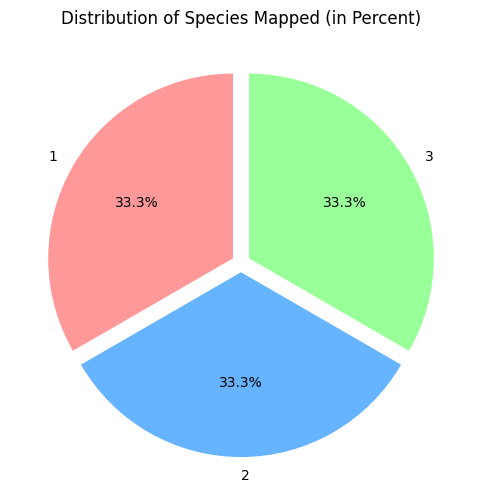

In [11]:
species_counts = data['species_mapped'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    species_counts, 
    labels=species_counts.index,  # Label by species (1, 2, 3)
    autopct='%1.1f%%',  # Display the percentage
    startangle=90,  # Start the pie chart at 90 degrees
    colors=['#ff9999', '#66b3ff', '#99ff99'],  # Optional: Colors for each category
    explode=(0.05, 0.05, 0.05)  # Optional: Separate the slices a little
)

# Add a title
plt.title('Distribution of Species Mapped (in Percent)')

# Show the plot
plt.show()

## Step 9: Prepare Data for Training

We separate the features and the target variable for training the model.

In [12]:
y = data["species_mapped"]
x = data.drop(columns="species_mapped")

x,y

---------------------------------------------


0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species_mapped, Length: 150, dtype: int64

## Step 10: Split the Dataset

We split the dataset into training and testing sets.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Step 11: Create and Train the Decision Tree Model

We create an instance of the Decision Tree classifier and train it using the training data.

In [14]:
model = DecisionTreeClassifier()

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

## Step 12: Make Predictions

We use the trained model to make predictions on the test set.

In [16]:
y_pred = model.predict(x_test)

## Step 13: Evaluate the Model

Finally, we evaluate the accuracy of the model on the test set.

In [17]:
accuracy = model.score(x_test, y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


Summary

In this tutorial, we demonstrated how to use a Decision Tree classifier to predict the species of Iris flowers based on their features. Through data exploration, visualization, and model training, we gained insights into the classification process.